In [1]:
#@title **Importar bibliotecas necessárias** { vertical-output: true, form-width: "60%" }

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import gdown

## Importar amostras de 100.000 em cada dataset por link compartilhado

In [2]:
# Amostra SRAG
srag_file_id = '1E1N10m0YPm0g2PvAnSO5YYc1sFfqrzRi'
srag_url = f'https://drive.google.com/uc?id={srag_file_id}'
srag_output = 'SRAG-2021-RESIZED.csv'
gdown.download(srag_url, srag_output, quiet=False)
df_srag = pd.read_csv(srag_output, sep=',')

# Amostra SIM
sim_file_id = '1P1-TtXlJMgyvVPStpAWHUES55ZqSMoq2'
sim_url = f'https://drive.google.com/uc?id={sim_file_id}'
sim_output = 'SIM-2021-RESIZED.csv'
gdown.download(sim_url, sim_output, quiet=False)
df_sim = pd.read_csv(sim_output, sep=',')


Downloading...
From: https://drive.google.com/uc?id=1E1N10m0YPm0g2PvAnSO5YYc1sFfqrzRi
To: /content/SRAG-2021-RESIZED.csv
100%|██████████| 56.7M/56.7M [00:00<00:00, 135MB/s]
/tmp/ipython-input-2-738819002.py:6: DtypeWarning: Columns (59,61,62,63,91,105,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_srag = pd.read_csv(srag_output, sep=',')
Downloading...
From: https://drive.google.com/uc?id=1P1-TtXlJMgyvVPStpAWHUES55ZqSMoq2
To: /content/SIM-2021-RESIZED.csv
100%|██████████| 29.5M/29.5M [00:00<00:00, 88.1MB/s]
/tmp/ipython-input-2-738819002.py:13: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sim = pd.read_csv(sim_output, sep=',')


## Importar arquivos CSV (Caso a opção anterior não funcione)
- Links:

  - SRAG: https://drive.usercontent.google.com/uc?id=1E1N10m0YPm0g2PvAnSO5YYc1sFfqrzRi&export=download
  - SIM: https://drive.usercontent.google.com/uc?id=1P1-TtXlJMgyvVPStpAWHUES55ZqSMoq2&export=download

- Baixe os arquivos das amostras
- Crie uma pasta "Colab Notebooks" caso não exista e faça o uploado dos CSVs nela.

In [11]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

df_srag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SRAG-2021-RESIZED.csv', sep=',')

df_sim = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIM-2021-RESIZED.csv', sep=',')

Mounted at /content/drive/


/tmp/ipython-input-11-1964604918.py:4: DtypeWarning: Columns (59,61,62,63,91,105,114,116,117,118,122,143) have mixed types. Specify dtype option on import or set low_memory=False.
  df_srag = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SRAG-2021-RESIZED.csv', sep=',')
/tmp/ipython-input-11-1964604918.py:6: DtypeWarning: Columns (66) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sim = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SIM-2021-RESIZED.csv', sep=',')


## Análise: Comparação entre proporções de óbitos por sexo entre SRAG e SIM

Proporção de óbitos masculinos (SRAG): 0.554715938
Proporção de óbitos masculinos (SIM): 0.554650256
Proporção de óbitos femininos (SRAG): 0.445284062
Proporção de óbitos femininos (SIM): 0.445349744

Teste Qui-quadrado de independência:
Valor do Qui-quadrado: 0.0000
Graus de liberdade: 1
P-valor: 0.9964390434
Não há associação significativa entre sexo e sistema (SRAG vs SIM).


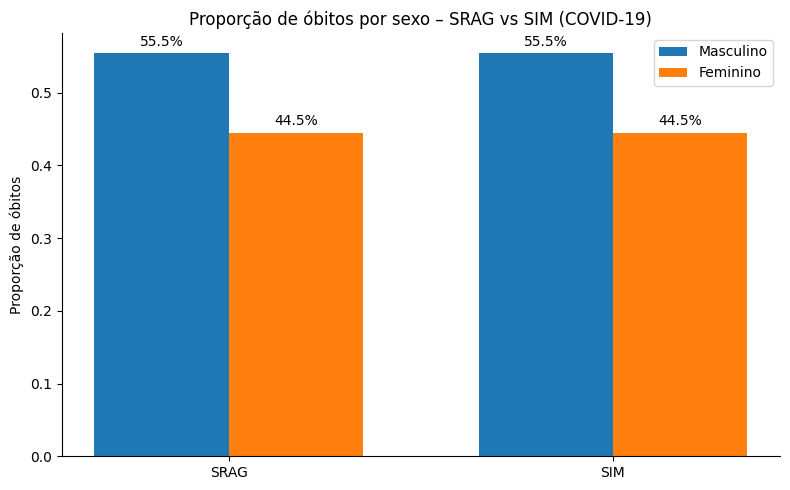

In [128]:
# Filtrar SRAG: apenas óbitos confirmados por COVID-19
df_srag_covid_obitos = df_srag[
    (df_srag['CLASSI_FIN'] == 5) &
    (df_srag['EVOLUCAO'] == 2) &
    (df_srag['CS_SEXO'].isin(['M', 'F']))
]

# Contar por sexo no SRAG
srag_contagem_sexo = df_srag_covid_obitos['CS_SEXO'].value_counts()
total_sexo_srag = srag_contagem_sexo.sum()
prop_srag_masc = srag_contagem_sexo.get('M', 0) / total_sexo_srag
prop_srag_fem = srag_contagem_sexo.get('F', 0) / total_sexo_srag

# Filtrar SIM: apenas óbitos por COVID-19
cid_covid = ['U071', 'U072', 'B342']
df_sim_covid = df_sim[df_sim['CAUSABAS'].astype(str).str.upper().isin(cid_covid)]

# Contar por sexo no SIM
sim_contagem_sexo = df_sim_covid['SEXO'].value_counts()
total_sexo_sim = sim_contagem_sexo.get(1, 0) + sim_contagem_sexo.get(2, 0)
prop_sim_masc = sim_contagem_sexo.get(1, 0) / total_sexo_sim
prop_sim_fem = sim_contagem_sexo.get(2, 0) / total_sexo_sim

# Mostrar proporções
print(f"Proporção de óbitos masculinos (SRAG): {prop_srag_masc:.9f}")
print(f"Proporção de óbitos masculinos (SIM): {prop_sim_masc:.9f}")
print(f"Proporção de óbitos femininos (SRAG): {prop_srag_fem:.9f}")
print(f"Proporção de óbitos femininos (SIM): {prop_sim_fem:.9f}")


# Parâmetros para o teste
x1 = srag_contagem_sexo.get('M', 0)
n1 = total_sexo_srag
x2 = sim_contagem_sexo.get(1, 0)
n2 = total_sexo_sim

# Proporções
p1 = x1 / n1
p2 = x2 / n2

from scipy.stats import chi2_contingency

tabela = np.array([
    [x1, n1 - x1],  # [masculino, feminino] para SRAG
    [x2, n2 - x2]   # [masculino, feminino] para SIM
])

# Teste qui-quadrado de independência
chi2, p_chi2, dof, expected = chi2_contingency(tabela)

# Resultados
print(f"\nTeste Qui-quadrado de independência:")
print(f"Valor do Qui-quadrado: {chi2:.4f}")
print(f"Graus de liberdade: {dof}")
print(f"P-valor: {p_chi2:.10f}")

# Interpretação
alpha = 0.05
if p_chi2 < alpha:
    print("Há associação significativa entre sexo e sistema (SRAG vs SIM).")
else:
    print("Não há associação significativa entre sexo e sistema (SRAG vs SIM).")


# Gráfico de barras agrupadas: Proporção de óbitos por sexo nos sistemas SRAG e SIM

# Preparar dados para o gráfico
sistemas = ['SRAG', 'SIM']
proporcoes_masc = [prop_srag_masc, prop_sim_masc]
proporcoes_fem = [prop_srag_fem, prop_sim_fem]

x = np.arange(len(sistemas))
largura = 0.35

# Criar o gráfico
fig, ax = plt.subplots(figsize=(8, 5))
barras_masc = ax.bar(x - largura/2, proporcoes_masc, largura, label='Masculino')
barras_fem = ax.bar(x + largura/2, proporcoes_fem, largura, label='Feminino')

# Rótulos e título
ax.set_ylabel('Proporção de óbitos')
ax.set_title('Proporção de óbitos por sexo – SRAG vs SIM (COVID-19)')
ax.set_xticks(x)
ax.set_xticklabels(sistemas)
ax.legend()

# Mostrar valores percentuais nas barras
for barras in [barras_masc, barras_fem]:
    for barra in barras:
        altura = barra.get_height()
        ax.annotate(f'{altura:.1%}',
                    xy=(barra.get_x() + barra.get_width() / 2, altura),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

sns.despine()
plt.tight_layout()
plt.show()
